In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

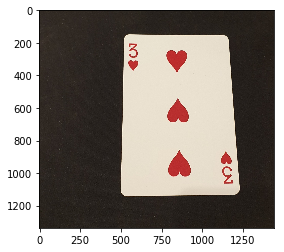

In [4]:
image = cv2.imread('heart3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

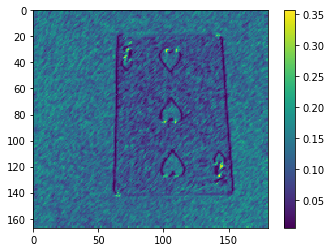

In [16]:
cell_size = (8,8)
block_size = (2,2)
nbins = 9
hog = cv2.HOGDescriptor(_winSize = (gray.shape[1]//cell_size[1] * cell_size[1],
                                   gray.shape[0] // cell_size[0] * cell_size[0]),
                       _blockSize = (block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                       _blockStride = (cell_size[1], cell_size[0]),
                       _cellSize = (cell_size[1], cell_size[0]),
                       _nbins = nbins)
n_cells = (gray.shape[0]//cell_size[0], gray.shape[1]//cell_size[1])

hog_feats = hog.compute(gray).reshape(n_cells[1] - block_size[1]+1,
                                      n_cells[0] - block_size[0] +1,
                                      block_size[0], block_size[1], nbins).transpose((1,0,2,3,4))
gradients = np.zeros((n_cells[0], n_cells[1], nbins))
cell_counts = np.full((n_cells[0], n_cells[1], 1), 0, dtype = int)
for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y +1,
                 off_x:n_cells[1] - block_size[1] + off_x +1] += hog_feats[:, :, off_y, off_x, :]
        cell_counts[off_y:n_cells[0] - block_size[0] + off_y +1,
                  off_x:n_cells[1] - block_size[1] + off_x +1] +=1
        
gradients /= cell_counts

color_bins = 5
plt.pcolor(gradients[:,:,color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

In [20]:
gradients[0][0]

array([0.14184664, 0.12483947, 0.16115019, 0.1904366 , 0.22556162,
       0.18458298, 0.09877761, 0.05835047, 0.06413649])

In [24]:
for i in range(10):
    print(gradients[i][0])

[0.14184664 0.12483947 0.16115019 0.1904366  0.22556162 0.18458298
 0.09877761 0.05835047 0.06413649]
[0.14286983 0.11060608 0.14342832 0.17347051 0.22298852 0.16507842
 0.12387982 0.18178863 0.13001084]
[0.1717891  0.14878938 0.13485711 0.08919486 0.1451607  0.09398028
 0.14137708 0.15105162 0.17973422]
[0.17768226 0.16476933 0.17256081 0.13797582 0.15123355 0.1439467
 0.13068534 0.16624672 0.20429386]
[0.1496474  0.1729178  0.17363099 0.16453275 0.19035201 0.1529211
 0.1053754  0.12282698 0.14362853]
[0.15126304 0.1572645  0.13755306 0.11400515 0.15440015 0.14407687
 0.13649296 0.18256602 0.1550024 ]
[0.17253138 0.19370168 0.18258451 0.16932028 0.21738987 0.13073894
 0.15296876 0.15112999 0.14593782]
[0.10749757 0.1563669  0.14643554 0.11338244 0.16205565 0.13055516
 0.17664341 0.14252722 0.16804584]
[0.13454802 0.16963875 0.20570749 0.19212104 0.10624859 0.09048342
 0.19336947 0.1910871  0.1397535 ]
[0.20350865 0.14540361 0.14866177 0.08268656 0.14263166 0.10477832
 0.13827163 0.155

In [5]:
cell_size = (8,8)
block_size = (2,2)
nbins = 9
hog = cv2.HOGDescriptor(_winSize = (gray.shape[1]//cell_size[1] * cell_size[1],
                                   gray.shape[0] // cell_size[0] * cell_size[0]),
                       _blockSize = (block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                       _blockStride = (cell_size[1], cell_size[0]),
                       _cellSize = (cell_size[1], cell_size[0]),
                       _nbins = nbins)

In [11]:
hog.winSize

(1440, 1336)

In [10]:
hog.blockSize

(16, 16)

In [13]:
hog.blockStride

(8, 8)

In [14]:
hog.cellSize

(8, 8)

In [ ]:
hog.winSize[0]